# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [ ]:
import pandas as pd
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('/content/haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [ ]:
df.shape

(306, 4)

There are 150 data points and 4 features in the given dataset

In [ ]:
# Show all columns in dataset
df.columns

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')

In [ ]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### There are 225 people who survived while 81 people didn't survive.
### The dataset is imbalanced data because the difference between survival and non survival people is quite large.






### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

The objective of the problem is:


*   To predict the survival of patient who went through the surgery for breast cancer.
*   To get the more insights from the data through visualization.


*   To perform the univariate analysis to draw the insight about each feature and get more clear understanding.
*   To find out which feature plays an important role to predict the survival rate.





### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

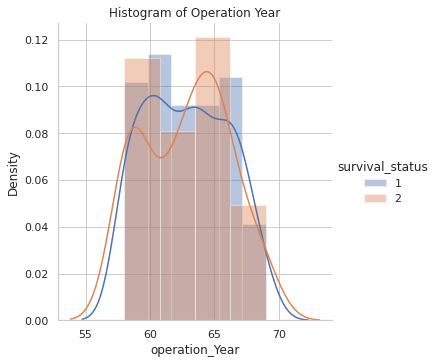

In [ ]:
import seaborn as sns
# Ignore warning
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
sns.FacetGrid(df, hue="survival_status", size=5) \
   .map(sns.distplot, "operation_Year") \
   .add_legend();
plt.title('Histogram of Operation Year')
plt.show();

1.   The graph is not giving clear information.
2.   There is overlap between the classes




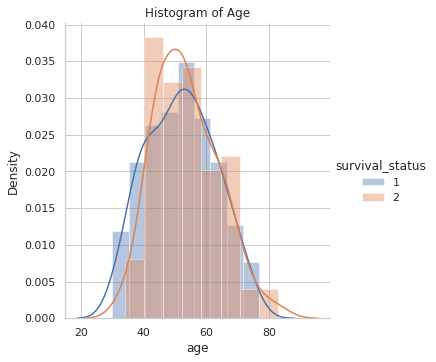

In [ ]:
import seaborn as sns
# Ignore warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.FacetGrid(df, hue="survival_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of Age')
plt.show();



*  This graph shows that our age column is normally distributed.
*   As the data is highly overlapped it is not giving clear picture.








[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


Text(0.5, 1.0, 'CDF and PDF plot for data')

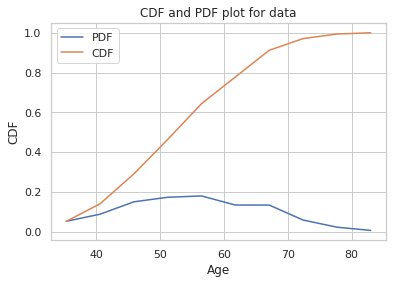

In [ ]:
import numpy as np
sns.set_theme(style="whitegrid")
counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.ylabel("CDF")
plt.legend(labels=['PDF', 'CDF'])
plt.title('CDF and PDF plot for data')



1.   In this plot we can observe that around 75% of the people who survived had age less than or equal to 60. 



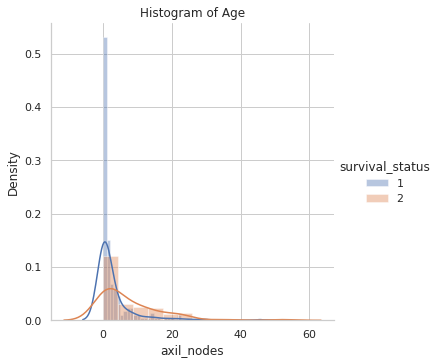

In [ ]:
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.FacetGrid(df, hue="survival_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title('Histogram of Age')
plt.show();



*   Person with axile nodes in range 0 to 3 have higher chance of survival.



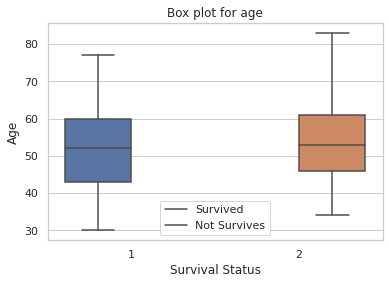

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(x= 'survival_status', y = 'age', data = df, hue = 'survival_status' )
plt.title('Box plot for age')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.legend(labels = ['Survived', "Not Survives"])

   

*  25% of the people who survied has age of around 42 years
*   75% of the people survived has age of around 60 years


*   25% of people who did not survive had age around 46 years
*   75% of people who didnot survived has age arond 62 years.


*  It doesn't have any outliers. 
*  The minimum and maximum age for the people survived are 30 years and 78 years.

*   Minimum age for person who did not survive is around 35 years.
*   Maximum age for person who did not survive is 80+ years.








Text(0, 0.5, 'Operation_Year')

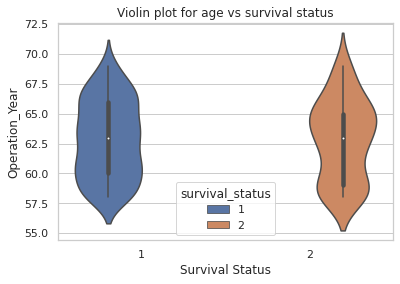

In [ ]:
sns.set_theme(style="whitegrid")
sns.violinplot(x = 'survival_status', y = 'operation_Year', hue = 'survival_status', data = df)
plt.title('Violin plot for age vs survival status')
plt.xlabel('Survival Status')
plt.ylabel('Operation_Year')



*  The data is not a perfect gausian distribution
*   The maximum operation year is 68 for survived people and for unsurvived people is 69




### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


Text(0, 0.5, 'Axil_Nodes')

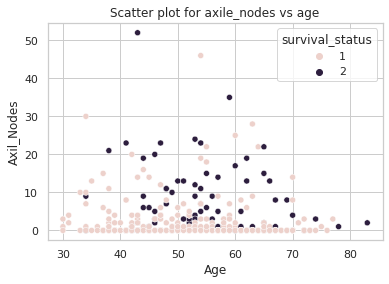

In [ ]:
sns.scatterplot(data = df, x = 'age', y = 'axil_nodes', hue = 'survival_status')
plt.title("Scatter plot for axile_nodes vs age")
plt.xlabel('Age')
plt.ylabel('Axil_Nodes')



*   People around age 40 have higher survival rate than the others.




Text(0.5, 1.0, 'pair plot')

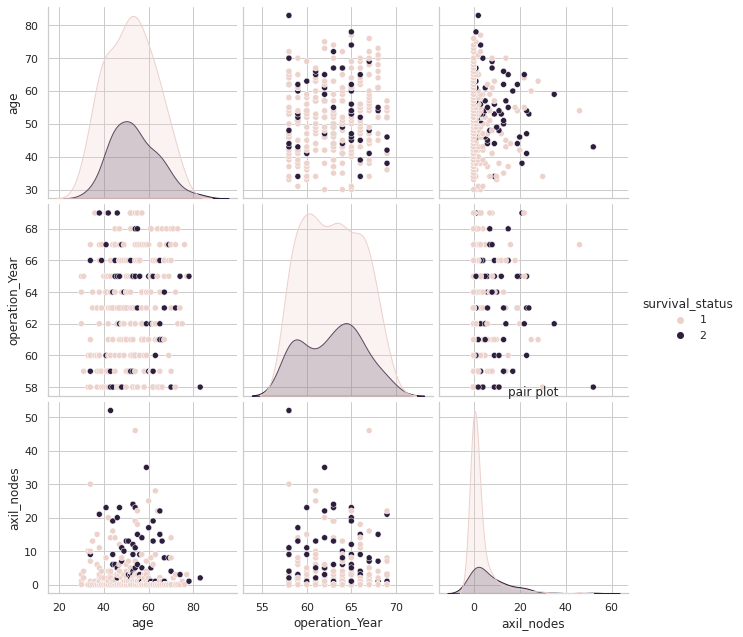

In [ ]:
sns.pairplot(df, hue = 'survival_status', size = 3)
plt.title("pair plot")



*   there is some overlap between age and axiles_nodes. It seems important features. 
*  It also contain some outliers.

*   The plot between axile_nodes and operation_year is not giving much idea.






### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

# **From Pair Plot and Scatter Plot bold text**

The final observations are:


*   The age column is most important features among all.
*   From all the plots it is clear that most of the people who survived has age aroud 40 years.

*   People with 0 axile nodes have highest probability to survive.






# **Observation from Univariate Analysis (Box Plot, Violin Plot, CDF, PDF)**



*   people with axile nodes 0 are most survived one.
*    There is maximum chance of survival for patients who axile nodes is between 0 to 3
*  There is much overlap for the people age greater than 40 years, but looks like there more probability of people died is higher.









